# Drug Review Machine Learning Proeject  

### It is a python machine learning project . The main objective of the project  - 
> To predict the Rating of the review.

> To predict the sentiment of the customer by the review.

> To predict the popular condition based on the review .


## About Dataset : 

 This dataset was used for the Winter 2018 Kaggle University Club Hackathon and is now publicly available.
 Note: The types of data and recommendation based solutions provided by the contestants are purely for NLP learning purposes. They are not suitable for a real world drug recommendations solutions. 

dataset Link - https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018

 ### Attributes :

1. uniqueID: Id of the drug
2. drugName : name of drug 
3. condition : name of condition
4. review : patient review
5. rating : 10 star patient rating
6. date : date of review entry
7. usefulCount : number of users who found review useful



## Importing the necessary modules 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import seaborn as sns 
import re
import tensorflow_hub as hub


from sklearn.metrics import r2_score


### Loading the data and convert in DataFrame

* Loading Train Data

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drugtrain.csv' ,  usecols = ['drugName' , 'condition' , 'review' , 'rating'])

* Loading Test Data

In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drugtest.csv' ,  usecols = ['drugName' , 'condition' , 'review' , 'rating'])

Joining them and  make whole data set

In [6]:
df = pd.concat([df1,df2])

In [7]:
df.head()

,drugName,condition,review,rating
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9


To check there is no any null values 

In [8]:
df.isna().sum()

drugName        0
condition    1194
review          0
rating          0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.describe()

,rating
count,213869.000000
mean,6.991149
std,3.275792
min,1.000000
25%,5.000000
50%,8.000000
75%,10.000000
max,10.000000


As we can see that

In the review there are some unknown symbols and the number with don't play a big role in the model learning so we had need to remove it.

In [11]:

def clean_text(x):
   pattern = r'[^a-zA-z0-9\s]'
   x = re.sub(pattern, '', x)
   return x

def remove_num(x):
  if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
  return x   

In [12]:
df['review'] = df['review'].apply(lambda x : clean_text(x)).apply(lambda x : remove_num(x))

> # 1. To predict the rating of the review  

In [13]:
data_rating = df[['review' , 'rating']]

In [14]:
data_rating.head()

,review,rating
0,It has no side effect I take it in combination...,9
1,My son is halfway through his fourth week of I...,8
2,I used to take another oral contraceptive whic...,5
3,This is my first time using any form of birth ...,8
4,Suboxone has completely turned my life around ...,9


In [15]:
data_rating.tail()

,review,rating
53761,I have taken Tamoxifen for 5 years Side effect...,10
53762,I###ve been taking Lexapro escitaploprgram sin...,9
53763,I###m married ## years old and I have no kids ...,8
53764,I was prescribed Nucynta for severe neckshould...,1
53765,It works,9


array([[<Axes: title={'center': 'rating'}>]], dtype=object)

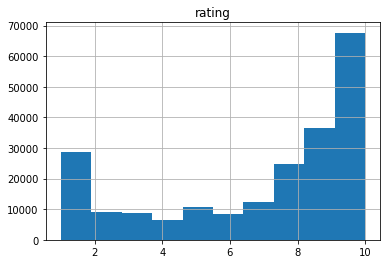

In [16]:
data_rating.hist(bins=10)

In [17]:
data_rating.describe()

,rating
count,213869.000000
mean,6.991149
std,3.275792
min,1.000000
25%,5.000000
50%,8.000000
75%,10.000000
max,10.000000


### Spliting the data into Train & Test Dataset

In [18]:
train_rate = data_rating.sample(frac=0.8, random_state = 0)
test_rate = data_rating.drop(train_rate.index)

### Embeding Layer 
This is the Layer in  which text dataset change into the numerical values

In [19]:
embedding = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
hub_layer = hub.KerasLayer(embedding, output_shape=[128],
                           input_shape=[],
                           dtype=tf.string,
                           trainable=True)

## Using the Keras Sequential net model for the training data 

In [33]:
model = tf.keras.Sequential()
model.add(hub_layer)
for units in [128,64,32,16]:
  model.add(tf.keras.layers.Dense(units, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.35))

model.add(tf.keras.layers.Dense(1))

### Model summary and all the no. of nuerons used in each layer

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dropout_14 (Dropout)        (None, 32)               

**Compiling the model**

In [35]:
model.compile(optimizer = 'adam',
              loss = 'mean_absolute_error',
              metrics= ['accuracy' , 'mse'])

In [36]:
train_rate.head()

,review,rating
6501,Started on ## mg which didn###t work Taking ##...,1
84894,I had vivid dream on Depakote I normally don##...,1
42222,The only drug that works for me,10
42539,Yes it works but ever since I started taking i...,4
58797,I love my Mirena I###m due in February to take...,10


In [37]:
train_features = train_rate.copy()
test_features = test_rate.copy()

train_labels = train_features.pop('rating')
test_labels = test_features.pop('rating')

### Training the model 

In [38]:
history = model.fit(
    train_features['review'],
    train_labels,
    batch_size= 512,
    epochs=4,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/4
268/268 [==============================] - 895s 3s/step - loss: 3.4988 - accuracy: 0.1250 - mse: 19.0769 - val_loss: 1.9427 - val_accuracy: 0.1352 - val_mse: 5.8942
Epoch 2/4
268/268 [==============================] - 893s 3s/step - loss: 2.4670 - accuracy: 0.1331 - mse: 9.8932 - val_loss: 1.8650 - val_accuracy: 0.1352 - val_mse: 5.7108
Epoch 3/4
268/268 [==============================] - 879s 3s/step - loss: 2.2328 - accuracy: 0.1334 - mse: 8.3932 - val_loss: 1.6502 - val_accuracy: 0.1352 - val_mse: 5.1221
Epoch 4/4
268/268 [==============================] - 881s 3s/step - loss: 2.1094 - accuracy: 0.1334 - mse: 7.6482 - val_loss: 1.6978 - val_accuracy: 0.1352 - val_mse: 5.3213


In [39]:
results = model.evaluate(test_features,  verbose = 2)

801/801 - 1s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - mse: 0.0000e+00 - 1s/epoch - 2ms/step


In [40]:
pred = model(test_features.pop('review'))
preds = np.round(pred[:,0]).astype(int)


## Accuracy of the Regression Model

---



---



In [41]:
print('accuracy score', r2_score(test_labels, preds))


accuracy score 0.49531061741321725


## 2. To predict the popular condition based on the review 


In [14]:
df['len'] = df['review'].apply(lambda x : len(x))

Checking the no. of word are used in review 

<Axes: >

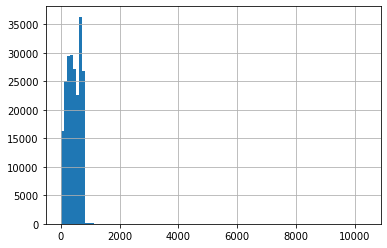

In [15]:
df['len'].hist(bins= 100)

In [ ]:
df.len.quantile(0.9)

# Preprocessing of conditions

In [16]:
count_df = df[['review' , 'condition']].groupby('condition').aggregate({'review': 'count'}).reset_index().sort_values('review' ,ascending = False )

In [17]:
len(count_df)

916

In [18]:
count_df.head()

,condition,review
175,Birth Control,38436
273,Depression,12164
613,Pain,8245
133,Anxiety,7812
87,Acne,7435


### Taking only the highest condition which has the more than the 2500 reviews for the efficiently model learning

In [19]:
target_condition = count_df[count_df['review']> 2500]['condition'].values

In [20]:
len(target_condition)

15

In [21]:
def condition_parser(x):
    if x in target_condition:
      return x
    else:
      return 'OTHER'  

df['condition'] = df['condition'].apply(lambda x : condition_parser(x))

In [22]:
len(df)

213869

In [23]:
data = df[df['condition'] != 'OTHER']

In [24]:
data.shape

(114308, 5)

In [25]:
import plotly.express as px

In [26]:
px.bar(count_df[count_df['review']> 2500], x = 'condition' , y='review') 

### For managing the class weights for the model to learn efficiently

In [27]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(data['condition']),
                                        y = data['condition']                                                    
                                    )
class_weights.sort()

In [28]:
class_weights

array([0.19826551, 0.62648252, 0.92426117, 0.9754907 , 1.02495405,
       1.35983821, 1.55394236, 1.56897948, 1.60196202, 1.69007171,
       2.26666667, 2.31627153, 2.45506873, 2.47018909, 2.77716229])

In [29]:
weights = {}

for index, weight in enumerate(class_weights):
  weights[index] = weight

In [30]:
weights

{0: 0.1982655149686058,
 1: 0.6264825167159925,
 2: 0.9242611683848797,
 3: 0.9754906980713433,
 4: 1.024954046177987,
 5: 1.3598382108018083,
 6: 1.5539423599782491,
 7: 1.5689794797886212,
 8: 1.601962020881508,
 9: 1.690071708434982,
 10: 2.2666666666666666,
 11: 2.3162715298885512,
 12: 2.455068728522337,
 13: 2.4701890869800107,
 14: 2.777162293488824}

In [31]:
train, val , test = np.split(data.sample(frac=1),[int(0.8 * len(data)) , int(0.9 * len(data))])

### Converting the dataset into the tensor frame

In [32]:
train_tf = tf.data.Dataset.from_tensor_slices((train['review'].values ,train['condition'].values ))
val_tf = tf.data.Dataset.from_tensor_slices((val['review'].values ,val['condition'].values ))
test_tf = tf.data.Dataset.from_tensor_slices((test['review'].values ,test['condition'].values ))

In [33]:
for text, target in train_tf.take(5):
  print('Review: {} , Target:{}'.format(text , target))

Review: b'My partner and I were having sex when the condom accidently broke  It was the ##th day of my cycle so I was fertile As you can imagine I was terrified I took the pill ## hours later I was worried that it wasn###t taken soon enough But if you take it within ## hrs you###ll be fine I experienced lots of cramping and mood swings for 2 weeks I seriously thought I was pregnant I###m not ready for a child and sadly was contemplating abortion My period came on the day it was expected and I couldn###t be happeir to have my period I###m going on the BC pills so I never have to experience this Just relax amp take this pill ASAP as timing is crucial' , Target:b'Emergency Contraception'
Review: b'I have used it for months now and it helps so much When my period comes around it somewhat helps but i###ll still get some acne and it clears up right after To me if i forget to put it on my face for one day it sucks' , Target:b'Acne'
Review: b'Originally started as a means to treat cystic acne 

In [34]:
codingdict = {}
for i,name in enumerate(np.unique(data['condition'])):
  codingdict[i] = name

codingdict

{0: 'ADHD',
 1: 'Abnormal Uterine Bleeding',
 2: 'Acne',
 3: 'Anxiety',
 4: 'Bipolar Disorde',
 5: 'Birth Control',
 6: 'Depression',
 7: 'Diabetes, Type 2',
 8: 'Emergency Contraception',
 9: 'High Blood Pressure',
 10: 'Insomnia',
 11: 'Obesity',
 12: 'Pain',
 13: 'Vaginal Yeast Infection',
 14: 'Weight Loss'}

In [35]:
codingdict.values()

dict_values(['ADHD', 'Abnormal Uterine Bleeding', 'Acne', 'Anxiety', 'Bipolar Disorde', 'Birth Control', 'Depression', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure', 'Insomnia', 'Obesity', 'Pain', 'Vaginal Yeast Infection', 'Weight Loss'])

## One hot encoding of Tensorflow 

In [37]:
table = tf.lookup.StaticHashTable(
          initializer = tf.lookup.KeyValueTensorInitializer(
              keys = tf.constant(list(codingdict.values())),
              values = tf.constant(list(codingdict.keys()))
          ),
          default_value=tf.constant(-1),
          name = 'target_encoding'
 )

@tf.function
def target(x):
    return table.lookup(x)

In [38]:
def show_batch(dataset , size=5):
    for batch, label in dataset.take(size):
        print(batch.numpy())
        print(target(label).numpy())

In [39]:
show_batch(train_tf, 6)

b'My partner and I were having sex when the condom accidently broke  It was the ##th day of my cycle so I was fertile As you can imagine I was terrified I took the pill ## hours later I was worried that it wasn###t taken soon enough But if you take it within ## hrs you###ll be fine I experienced lots of cramping and mood swings for 2 weeks I seriously thought I was pregnant I###m not ready for a child and sadly was contemplating abortion My period came on the day it was expected and I couldn###t be happeir to have my period I###m going on the BC pills so I never have to experience this Just relax amp take this pill ASAP as timing is crucial'
8
b'I have used it for months now and it helps so much When my period comes around it somewhat helps but i###ll still get some acne and it clears up right after To me if i forget to put it on my face for one day it sucks'
2
b'Originally started as a means to treat cystic acne and alleviate period cramps Anxiety runs in my family but I###ve never ha

In [40]:
def fetch(text , labels):
  return text, tf.one_hot(target(labels),15)

### One hot encoding for the categorical data

In [41]:
train_tf_d = train_tf.map(fetch)
val_tf_d = val_tf.map(fetch)
test_tf_d = test_tf.map(fetch)

In [42]:
next(iter(train_tf_d))

(<tf.Tensor: shape=(), dtype=string, numpy=b'My partner and I were having sex when the condom accidently broke  It was the ##th day of my cycle so I was fertile As you can imagine I was terrified I took the pill ## hours later I was worried that it wasn###t taken soon enough But if you take it within ## hrs you###ll be fine I experienced lots of cramping and mood swings for 2 weeks I seriously thought I was pregnant I###m not ready for a child and sadly was contemplating abortion My period came on the day it was expected and I couldn###t be happeir to have my period I###m going on the BC pills so I never have to experience this Just relax amp take this pill ASAP as timing is crucial'>,
 <tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>)

In [43]:
next(iter(val_tf_d))

(<tf.Tensor: shape=(), dtype=string, numpy=b'I have not seen Tresiba do much of anything I was on Lantus  ## units 2 sX daily along with Metformin ####mg 2 X daily and Victoza ## mg 1 X\r\nI switched from Lantus to Tresiba  ## units daily maintaining my other meds My morning readings sky rocketed from ##### to ### ### My diet stayed basically the same Over a period of 4 to 6 wks I increased the Tresiba slowly and am now up to ### units daily NO CHANGE  THIS IS CRAZY I###m going to try one more increase to ### units \r\nI had to stop Lantus bc my ins comp PPG  CVS Caremark decided not to cover Lantus'>,
 <tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>)

In [45]:
embedding = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
hub_layer = hub.KerasLayer(embedding, output_shape=[128],
                           input_shape=[],
                           dtype=tf.string,
                           trainable=True)

In [46]:
hub_layer(data['review'][:1])

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[ 1.5133892 ,  0.07999716,  0.29871646,  0.36414957,  0.24160796,
        -0.08852717,  0.15835421, -0.25982067, -0.0626125 , -0.04169567,
        -0.06801581, -0.181201  , -0.46910337, -0.1842287 , -0.15460587,
         0.0456545 , -0.36451405, -0.12149364, -0.29230863,  0.89406973,
         0.37847653,  0.2828351 , -0.12116676, -0.12344071,  0.05992597,
        -0.25840056,  0.27889144, -0.16702925, -0.09012706, -0.20788306,
        -0.10982233, -0.15696152, -0.02768278,  0.11133204,  0.3190685 ,
        -0.15354237, -0.11417083, -0.27576405, -0.0136132 ,  0.45100296,
        -0.09535834,  0.09670243, -0.1725773 ,  0.03200236,  0.25426275,
         0.38436976, -0.0767783 ,  0.18749246, -0.15769835, -0.02705142,
         0.25925156, -0.04383401, -0.10911492,  0.07380773, -0.05865023,
        -0.12705778, -0.42140114, -0.21514487,  0.23610839, -0.02249569,
        -0.09979727,  0.10039151,  0.21512431, -0.27293   , -0.04744955,
 

## Tensorflow Keras Sequential model

In [47]:
model = tf.keras.Sequential()
model.add(hub_layer)
for units in [128,128,64,32]:
  model.add(tf.keras.layers.Dense(units , activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(15,activation='softmax')) 

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

#### Use the model categorical entropy 

In [49]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [50]:
train_tf_d = train_tf_d.shuffle(70000).batch(512)
val_tf_d = val_tf_d.batch(512)

## Training the model

In [ ]:
history = model.fit(train_tf_d,
                    epochs = 8,
                    validation_data = val_tf_d,
                    verbose=1,
                    class_weight = weights)

Epoch 1/8


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5534: UserWarning:

"`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



179/179 [==============================] - 565s 3s/step - loss: 2.4861 - accuracy: 0.4617 - val_loss: 1.0572 - val_accuracy: 0.6466
Epoch 2/8
179/179 [==============================] - 565s 3s/step - loss: 1.2164 - accuracy: 0.6756 - val_loss: 0.7388 - val_accuracy: 0.7444
Epoch 3/8
179/179 [==============================] - 575s 3s/step - loss: 0.8586 - accuracy: 0.7487 - val_loss: 0.6383 - val_accuracy: 0.7769
Epoch 4/8
179/179 [==============================] - 575s 3s/step - loss: 0.6962 - accuracy: 0.7897 - val_loss: 0.5703 - val_accuracy: 0.8050
Epoch 5/8
179/179 [==============================] - 575s 3s/step - loss: 0.5905 - accuracy: 0.8195 - val_loss: 0.5380 - val_accuracy: 0.8233
Epoch 6/8
179/179 [==============================] - 574s 3s/step - loss: 0.5167 - accuracy: 0.8429 - val_loss: 0.5353 - val_accuracy: 0.8380
Epoch 7/8
179/179 [==============================] - 576s 3s/step - loss: 0.4596 - accuracy: 0.8661 - val_loss: 0.5149 - val_accuracy: 0.8547
Epoch 8/8
179/17

In [ ]:
len(test)

11431

In [ ]:
results = model.evaluate(test_tf_d.batch(11431) ,  verbose = 2)

1/1 - 1s - loss: 0.4977 - accuracy: 0.8689 - 1s/epoch - 1s/step


In [ ]:
test_data = test_tf_d.batch(11431)

In [ ]:
y_preds = model.predict(test_data)

1/1 [==============================] - 1s 1s/step


In [ ]:
test_data , test_labels = next(iter(test_tf_d.batch(11431)))

In [ ]:
from sklearn.metrics import classification_report

## Classification report of the model 

In [ ]:
print(classification_report(test_labels.numpy().argmax(axis=1) , y_preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.62      0.74       432
           1       0.00      0.00      0.00       261
           2       0.97      0.91      0.94       748
           3       0.83      0.75      0.79       822
           4       0.73      0.76      0.75       537
           5       0.92      0.99      0.95      3823
           6       0.80      0.89      0.84      1200
           7       0.89      0.90      0.90       346
           8       0.97      0.97      0.97       328
           9       0.88      0.85      0.87       331
          10       0.83      0.91      0.87       460
          11       0.70      0.58      0.64       478
          12       0.90      0.95      0.92       835
          13       0.99      0.94      0.97       317
          14       0.68      0.80      0.73       513

    accuracy                           0.87     11431
   macro avg       0.80      0.79      0.79     11431
weighted avg       0.85   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# 3. Sentiment Analysis of the model 

In [42]:
df.head()

,drugName,condition,review,rating
0,Valsartan,Left Ventricular Dysfunction,It has no side effect I take it in combination...,9
1,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8
2,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5
3,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8
4,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9


In [43]:
data = df[['review','rating']]

### Histogram of the rating

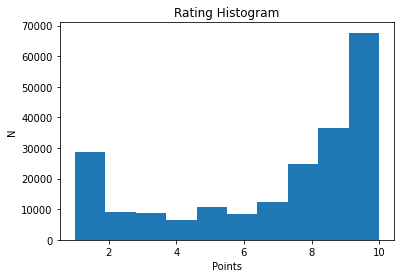

In [44]:
plt.hist(data.rating , bins=10)
plt.title("Rating Histogram")
plt.ylabel('N')
plt.xlabel('Points')
plt.show()

### Setting if patient rating is more than 6 then , he wil happy

In [45]:
def coding(x):
  if x > 6:
    return 1
  else:
    return 0   

In [46]:
data['label'] = data['rating'].apply(lambda x: coding(x))

<ipython-input-46-81491385f11c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['rating'].apply(lambda x: coding(x))


In [47]:
ready_data = data[['review' , 'label']]

In [48]:
ready_data.head()

,review,label
0,It has no side effect I take it in combination...,1
1,My son is halfway through his fourth week of I...,1
2,I used to take another oral contraceptive whic...,0
3,This is my first time using any form of birth ...,1
4,Suboxone has completely turned my life around ...,1


## Function to converting the dataset to the tensors

In [49]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["review"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [50]:
train, val , test = np.split(ready_data.sample(frac=1),[int(0.8 * len(ready_data)) , int(0.9 * len(ready_data))])

## Split the data into train , test, valid

In [53]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [54]:
embedding = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
hub_layer = hub.KerasLayer(embedding, output_shape=[128],
                           input_shape=[],
                           dtype=tf.string,
                           trainable=True)



In [55]:
hub_layer(data['review'][:1])

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[ 0.3275196 , -0.2086498 ,  0.03962558, -0.00300192,  0.03782035,
        -0.08031283,  0.0180529 , -0.03927071, -0.05095287, -0.0035451 ,
         0.06973346,  0.01330936, -0.15950292, -0.02694239, -0.21094179,
         0.012785  ,  0.04351325,  0.1609316 , -0.1039155 ,  0.09492093,
         0.02695529, -0.07999464, -0.07682676, -0.03611556,  0.17488533,
         0.0964494 ,  0.07596488, -0.07839283, -0.07818353, -0.15724126,
         0.00043147, -0.11177187,  0.06034434, -0.01436157,  0.09693598,
         0.04787712, -0.03946436,  0.01231825,  0.0804623 ,  0.01733095,
        -0.00523767, -0.10327744, -0.11031353, -0.14665918,  0.11018986,
        -0.04871843, -0.02977599,  0.22329238, -0.10126288,  0.16422161,
         0.09508658,  0.05291295, -0.03291499,  0.10956962, -0.00186563,
        -0.11530768, -0.09515128,  0.00054844,  0.15949555, -0.08205201,
        -0.00740083, -0.00675188,  0.12643717, -0.23959766, -0.00111499,
 

## Keras model for training 

In [56]:
model = tf.keras.Sequential()
model.add(hub_layer)
for units in [128,128,64,32]:
  model.add(tf.keras.layers.Dense(units , activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))  

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_18 (Dropout)        (None, 64)               

In [58]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [59]:
model.evaluate(train_data)

168/168 [==============================] - 5s 25ms/step - loss: 0.6836 - accuracy: 0.6493


[0.6836415529251099, 0.6493234634399414]

In [60]:
model.evaluate(valid_data)

21/21 [==============================] - 1s 23ms/step - loss: 0.6838 - accuracy: 0.6473


[0.6838142275810242, 0.6472623348236084]

## Model Learning 

In [61]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
168/168 [==============================] - 596s 4s/step - loss: 0.5151 - accuracy: 0.7436 - val_loss: 0.3790 - val_accuracy: 0.8307
Epoch 2/5
168/168 [==============================] - 553s 3s/step - loss: 0.3694 - accuracy: 0.8488 - val_loss: 0.3635 - val_accuracy: 0.8376
Epoch 3/5
168/168 [==============================] - 545s 3s/step - loss: 0.3185 - accuracy: 0.8717 - val_loss: 0.3404 - val_accuracy: 0.8538
Epoch 4/5
168/168 [==============================] - 546s 3s/step - loss: 0.2784 - accuracy: 0.8894 - val_loss: 0.3378 - val_accuracy: 0.8631
Epoch 5/5
168/168 [==============================] - 542s 3s/step - loss: 0.2396 - accuracy: 0.9072 - val_loss: 0.3294 - val_accuracy: 0.8763


In [62]:
model.evaluate(test_data)

21/21 [==============================] - 9s 449ms/step - loss: 0.3178 - accuracy: 0.8776


[0.3177950084209442, 0.8775891661643982]

# Conclusion :

Prediction of the Rating :
         Accuracy :  49.9%
         MSE      :  5.3

Prdiction of the Condition:
        Accuracy : 87%

Sentiment of Review :
        Accuracy : 87.7%
